In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
dataset = pd.read_csv('train.csv')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

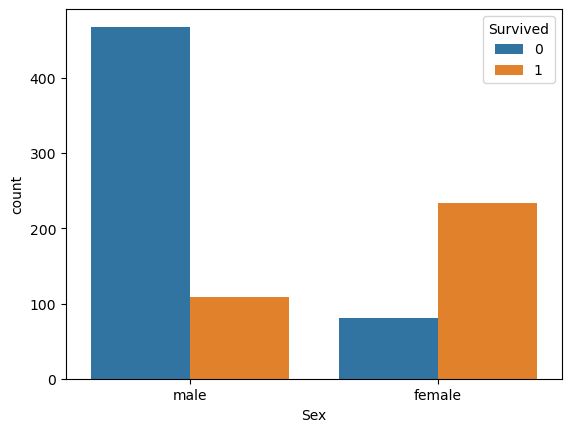

In [65]:
import seaborn as sns
sns.countplot('Sex', hue='Survived', data = dataset)

In [66]:
dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [67]:
#checking the missing values in each columns
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
#repalcing the missing values in Age with mean value
dataset['Age'].fillna(dataset['Age'].mean(),inplace = True)

In [69]:
#finding the mode value of Embarked to replace NaN with that
print(dataset['Embarked'].mode())

0    0.0
Name: Embarked, dtype: float64


In [70]:
#repalcing the missing values in Embarked with mode value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace = True)

In [71]:
X = dataset.iloc[:,[2,4,5,6,7,9,11]].values
y = dataset.iloc[:,1].values

In [72]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [73]:
print(X)

[[ 3.          0.         22.         ...  0.          7.25
   0.        ]
 [ 1.          1.         38.         ...  0.         71.2833
   1.        ]
 [ 3.          1.         26.         ...  0.          7.925
   0.        ]
 ...
 [ 3.          1.         29.69911765 ...  2.         23.45
   0.        ]
 [ 1.          0.         26.         ...  0.         30.
   1.        ]
 [ 3.          0.         32.         ...  0.          7.75
   2.        ]]


In [74]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [75]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 89, criterion = 'entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=89, random_state=0)

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [80]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is %f'% accuracy)

Accuracy is 0.829596


In [81]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is %f'% precision)

Precision is 0.787500


In [82]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is %f'% recall)

Recall is 0.750000


In [92]:
test_data = pd.read_csv('test.csv')
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [93]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [103]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace = True)

In [104]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace = True)

In [105]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [106]:
test = test_data.iloc[:,[1,3,4,5,6,8,10]].values

In [107]:
print(test)

[[ 3.          0.         34.5        ...  0.          7.8292
   2.        ]
 [ 3.          1.         47.         ...  0.          7.
   0.        ]
 [ 2.          0.         62.         ...  0.          9.6875
   2.        ]
 ...
 [ 3.          0.         38.5        ...  0.          7.25
   0.        ]
 [ 3.          0.         30.27259036 ...  0.          8.05
   0.        ]
 [ 3.          0.         30.27259036 ...  1.         22.3583
   1.        ]]


In [109]:
predictions = classifier.predict(test)

In [112]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
